# ***Import libraries***

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import warnings
import matplotlib.image as mpimg
import numpy as np
warnings.filterwarnings('ignore')

# ***Load the dataset***

In [2]:
dataset_folder_name = 'UTKFace'

In [3]:
dataset_dict = {
    'ethnicity_id': {
        0: 'white', 
        1: 'black', 
        2: 'asian', 
        3: 'indian', 
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}

dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['ethnicity_alias'] = dict((r, i) for i, r in dataset_dict['ethnicity_id'].items())

In [4]:
dataset_dict

{'ethnicity_id': {0: 'white',
  1: 'black',
  2: 'asian',
  3: 'indian',
  4: 'others'},
 'gender_id': {0: 'male', 1: 'female'},
 'gender_alias': {'male': 0, 'female': 1},
 'ethnicity_alias': {'white': 0,
  'black': 1,
  'asian': 2,
  'indian': 3,
  'others': 4}}

In [5]:
def parse_info_from_file(path):
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')            
            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['ethnicity_id'][int(race)]
        except Exception as ex:
            return None, None, None
        
def parse_dataset(dataset_path, ext='jpg'):     
    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))
    
    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)
        
    df = pd.DataFrame(records)
    df['file_path'] = files
    df.columns = ['age', 'gender', 'ethnicity', 'file_path']
    df = df.dropna()
    
    return df

In [6]:
utk_data = parse_dataset(dataset_folder_name)
utk_data['file_name'] = ''
utk_data['file_name'] = utk_data.apply(lambda x: x['file_path'].split('\\')[-1], axis=1)
utk_data.head()

,age,gender,ethnicity,file_path,file_name
0,100.0,male,white,UTKFace\100_0_0_20170112213500903.jpg.chip.jpg,100_0_0_20170112213500903.jpg.chip.jpg
1,100.0,male,white,UTKFace\100_0_0_20170112215240346.jpg.chip.jpg,100_0_0_20170112215240346.jpg.chip.jpg
2,100.0,female,white,UTKFace\100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg
3,100.0,female,white,UTKFace\100_1_0_20170112213001988.jpg.chip.jpg,100_1_0_20170112213001988.jpg.chip.jpg
4,100.0,female,white,UTKFace\100_1_0_20170112213303693.jpg.chip.jpg,100_1_0_20170112213303693.jpg.chip.jpg


# ***Visualize and Prepare Data***

Text(0, 0.5, 'count')

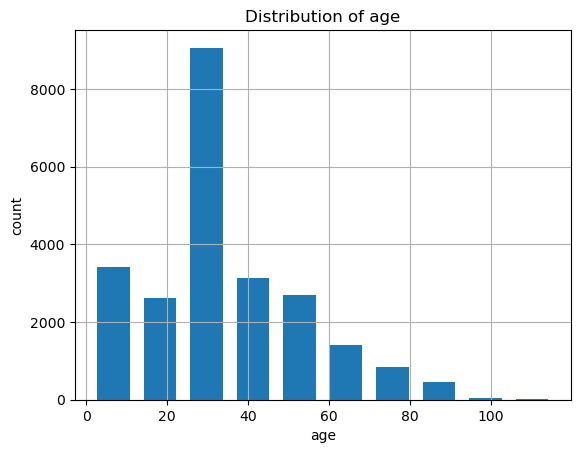

In [7]:
utk_data['age'].hist(rwidth=0.7)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')

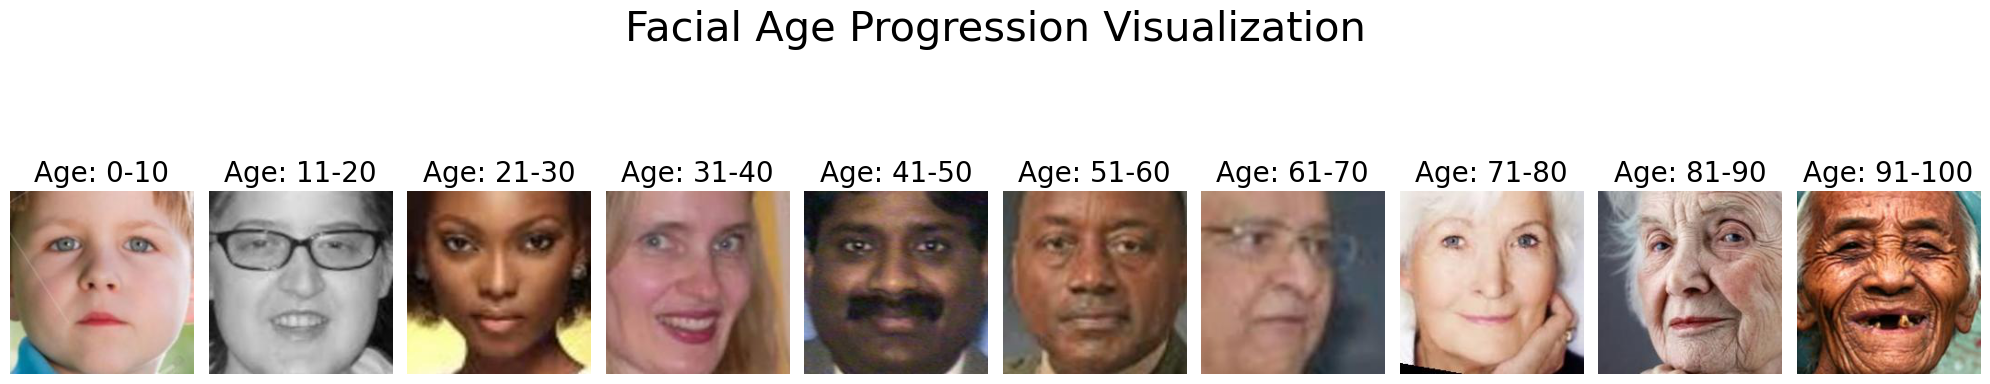

In [8]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
utk_data['age_group'] = pd.cut(utk_data['age'], bins=age_bins, labels=age_labels, right=False)

# Create a subplot for each age group
fig, axes = plt.subplots(1, len(age_labels), figsize=(20, 5))

# Loop through each age group and plot a representative face
for i, age_group in enumerate(age_labels):
    sample_image_path = utk_data[utk_data['age_group'] == age_group]['file_path'].sample(1).iloc[0]
    img = mpimg.imread(sample_image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Age: {age_group}', fontsize=20)  # Adjust font size as needed

plt.suptitle('Facial Age Progression Visualization', fontsize=30)  # Increase suptitle font size
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout
plt.show()


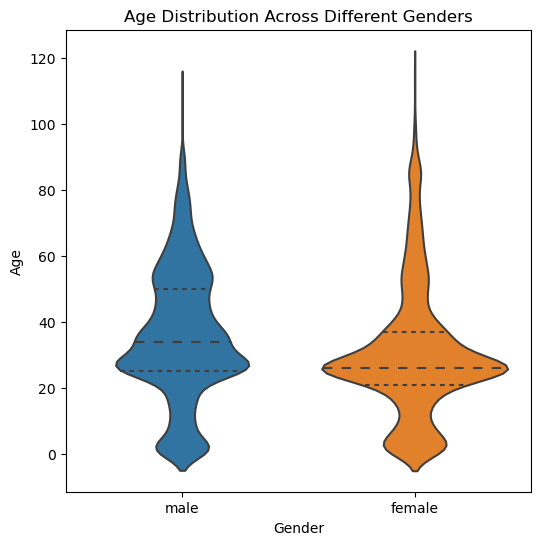

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Comparative Analysis: Age Distribution Across Different Genders
plt.figure(figsize=(6, 6))
sns.violinplot(x='gender', y='age', data=utk_data, inner='quartile')
plt.title('Age Distribution Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


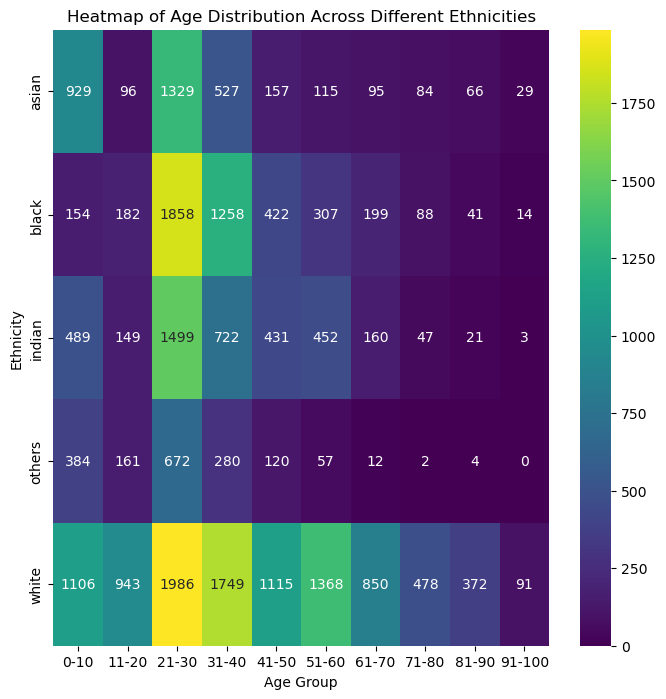

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with the parsed UTKFace dataset information

# Step 1: Data Binning
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Example age bins
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
utk_data['age_group'] = pd.cut(utk_data['age'], bins=age_bins, labels=age_labels, right=False)

# Step 2: Pivot Table Creation
pivot_table = utk_data.pivot_table(index='ethnicity', columns='age_group', values='age', aggfunc='count')

# Step 3: Heatmap Generation
plt.figure(figsize=(8, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='d')  # Added fmt='d' to display integers
plt.title('Heatmap of Age Distribution Across Different Ethnicities')
plt.xlabel('Age Group')
plt.ylabel('Ethnicity')
plt.show()


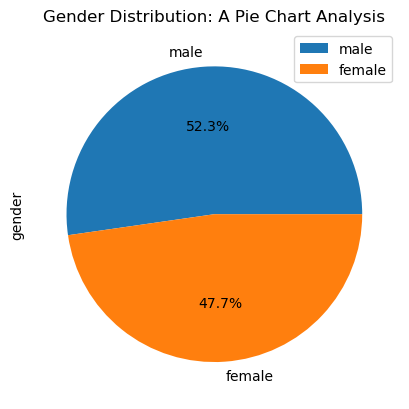

In [11]:
utk_data['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.title('Gender Distribution: A Pie Chart Analysis')
plt.legend()

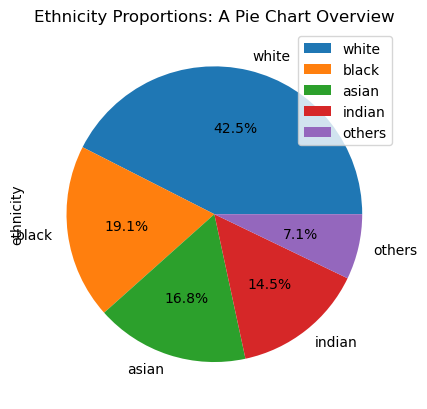

In [12]:
utk_data['ethnicity'].value_counts().plot.pie(autopct="%1.1f%%", labels=['white', 'black', 'asian', 'indian', 'others'])
plt.title('Ethnicity Proportions: A Pie Chart Overview')
plt.legend()

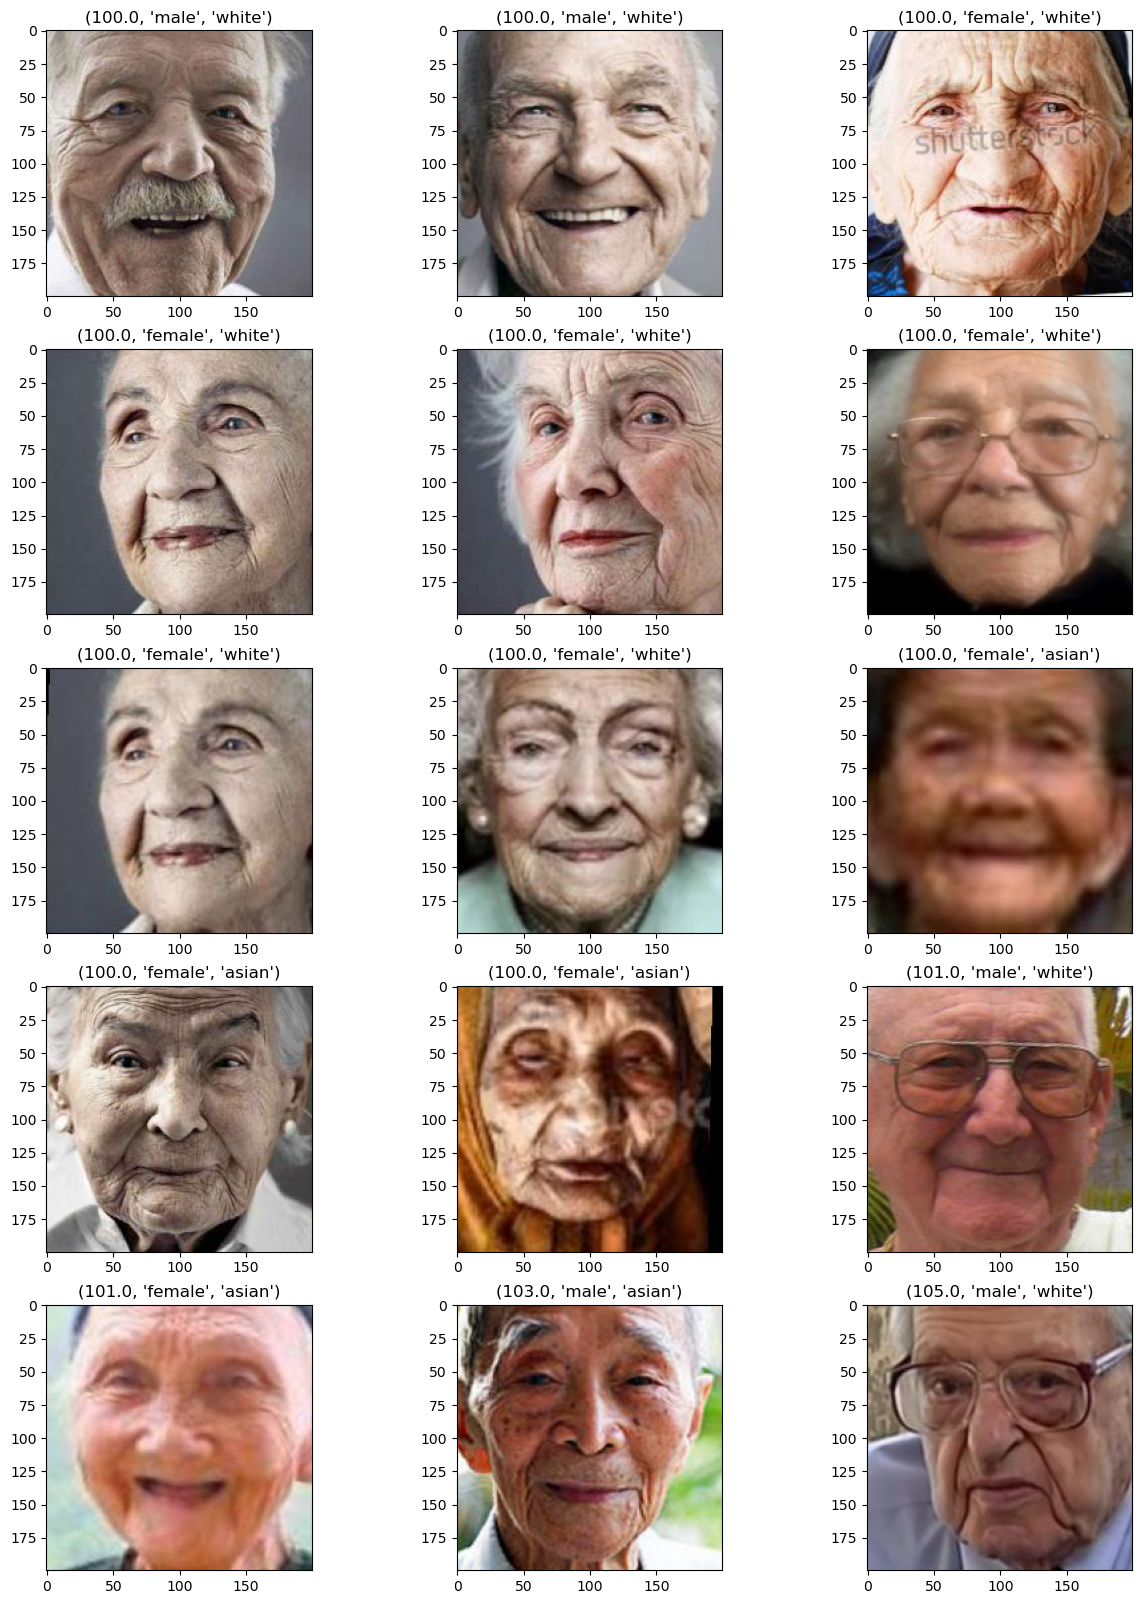

In [13]:
plt.figure(figsize=(15,20))

for i in range(15):
    plt.subplot(5,3,i+1)
    file = utk_data['file_path'][i]
    image = imread(file)
    plt.imshow(image)
    plt.title((utk_data['age'][i], utk_data['gender'][i], utk_data['ethnicity'][i]))

In [14]:
utk_data['gender'] = utk_data.apply(lambda x : dataset_dict['gender_alias'][x['gender']], axis = 1)
utk_data['ethnicity'] = utk_data.apply(lambda x : dataset_dict['ethnicity_alias'][x['ethnicity']], axis = 1)
utk_data.head()

,age,gender,ethnicity,file_path,file_name,age_group
0,100.0,0,0,UTKFace\100_0_0_20170112213500903.jpg.chip.jpg,100_0_0_20170112213500903.jpg.chip.jpg,NaN
1,100.0,0,0,UTKFace\100_0_0_20170112215240346.jpg.chip.jpg,100_0_0_20170112215240346.jpg.chip.jpg,NaN
2,100.0,1,0,UTKFace\100_1_0_20170110183726390.jpg.chip.jpg,100_1_0_20170110183726390.jpg.chip.jpg,NaN
3,100.0,1,0,UTKFace\100_1_0_20170112213001988.jpg.chip.jpg,100_1_0_20170112213001988.jpg.chip.jpg,NaN
4,100.0,1,0,UTKFace\100_1_0_20170112213303693.jpg.chip.jpg,100_1_0_20170112213303693.jpg.chip.jpg,NaN


In [15]:
utk_data = utk_data.astype({'age': int, 'gender': int, 'ethnicity': int, 'file_path': str, 'file_name': str})
utk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23705 entries, 0 to 23707
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        23705 non-null  int32   
 1   gender     23705 non-null  int32   
 2   ethnicity  23705 non-null  int32   
 3   file_path  23705 non-null  object  
 4   file_name  23705 non-null  object  
 5   age_group  23673 non-null  category
dtypes: category(1), int32(3), object(2)
memory usage: 1.3+ MB


In [16]:
SPLIT = 0.2

from sklearn.model_selection import train_test_split

training_data, validation_data = train_test_split(utk_data, test_size=SPLIT)

n_train = len(training_data)
n_val = len(validation_data)

print('No. of training image:', n_train)
print('No. of validation image:', n_val)

No. of training image: 18964
No. of validation image: 4741


In [17]:
training_data

,age,gender,ethnicity,file_path,file_name,age_group
7527,26,1,2,UTKFace\26_1_2_20170116184657842.jpg.chip.jpg,26_1_2_20170116184657842.jpg.chip.jpg,21-30
2209,1,1,0,UTKFace\1_1_0_20161219154510229.jpg.chip.jpg,1_1_0_20161219154510229.jpg.chip.jpg,0-10
17094,46,1,1,UTKFace\46_1_1_20170116001421842.jpg.chip.jpg,46_1_1_20170116001421842.jpg.chip.jpg,41-50
22177,75,0,0,UTKFace\75_0_0_20170111201904798.jpg.chip.jpg,75_0_0_20170111201904798.jpg.chip.jpg,71-80
7627,26,1,3,UTKFace\26_1_3_20170109134510359.jpg.chip.jpg,26_1_3_20170109134510359.jpg.chip.jpg,21-30
...,...,...,...,...,...,...
21003,63,0,3,UTKFace\63_0_3_20170119211952608.jpg.chip.jpg,63_0_3_20170119211952608.jpg.chip.jpg,61-70
18761,53,1,0,UTKFace\53_1_0_20170105171816333.jpg.chip.jpg,53_1_0_20170105171816333.jpg.chip.jpg,51-60
16421,44,0,0,UTKFace\44_0_0_20170104205257195.jpg.chip.jpg,44_0_0_20170104205257195.jpg.chip.jpg,41-50
7969,27,0,0,UTKFace\27_0_0_20170116220751583.jpg.chip.jpg,27_0_0_20170116220751583.jpg.chip.jpg,21-30


In [18]:
HEIGHT = WIDTH = 128

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 64

train_generator = train_datagen.flow_from_dataframe(training_data, 
                                                    directory=dataset_folder_name, 
                                                    x_col = 'file_name', 
                                                    y_col = ['age', 'gender', 'ethnicity'], 
                                                    target_size = (HEIGHT, WIDTH),
                                                    class_mode = 'multi_output',
                                                    batch_size = BATCH_SIZE,
                                                    seed = 37)

val_generator = val_datagen.flow_from_dataframe(validation_data, 
                                                directory=dataset_folder_name, 
                                                x_col = 'file_name', 
                                                y_col = ['age', 'gender', 'ethnicity'], 
                                                target_size = (HEIGHT, WIDTH),
                                                class_mode = 'multi_output',
                                                batch_size = BATCH_SIZE,
                                                seed = 37)

Found 18964 validated image filenames.
Found 4741 validated image filenames.


# ***Build the CNN network in a Multi-Task Learning manner***

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
import tensorflow as tf

class MTL_UTK():
    def make_default_hidden_layers(self, inputs):
        x = Conv2D(16, (3, 3), padding="same")(inputs)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(3, 3))(x)
        x = Dropout(0.25)(x)        
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)        
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)        
        return x  
    
    def build_ethnicity_branch(self, inputs, num_ethnicities):
        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(num_ethnicities)(x)
        x = Activation("softmax", name="ethnicity_output")(x)        
        return x  
    
    def build_gender_branch(self, inputs, num_genders=1): 
        x = Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)       
        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(num_genders)(x)
        x = Activation("sigmoid", name="gender_output")(x)        
        return x  
    
    def build_age_branch(self, inputs):            
        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="age_output")(x)        
        return x 
    
    def assemble_full_model(self, height, width, num_ethnicities):       
        input_shape = (height, width, 3)        
        inputs = Input(shape=input_shape)        
        age_branch = self.build_age_branch(inputs)
        gender_branch = self.build_gender_branch(inputs)
        ethnicity_branch = self.build_ethnicity_branch(inputs, num_ethnicities)        
        model = Model(inputs=inputs,
                     outputs = [age_branch, gender_branch, ethnicity_branch],
                     name="face_net")        
        return model

In [20]:
model = MTL_UTK().assemble_full_model(HEIGHT, WIDTH, num_ethnicities=len(dataset_dict['ethnicity_alias']))

model.summary()

Model: "face_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                          

                                                                                                  
 activation_2 (Activation)      (None, 21, 21, 32)   0           ['conv2d_2[0][0]']               
                                                                                                  
 activation_6 (Activation)      (None, 21, 21, 32)   0           ['conv2d_5[0][0]']               
                                                                                                  
 activation_10 (Activation)     (None, 21, 21, 32)   0           ['conv2d_8[0][0]']               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 21, 21, 32)  128         ['activation_2[0][0]']           
 rmalization)                                                                                     
                                                                                                  
 batch_nor

In [21]:
init_lr = 1e-4
epochs = 50

In [22]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=init_lr, decay=init_lr / epochs)
model.compile(optimizer=opt, 
              loss={
                  'age_output': 'mse',
                  'gender_output': 'binary_crossentropy',
                  'ethnicity_output': 'sparse_categorical_crossentropy'},
              
              loss_weights={
                  'age_output': 4., 
                  'gender_output': 0.1,
                  'ethnicity_output': 1.5},
              
              metrics={
                  'age_output': 'mae', 
                  'gender_output': 'accuracy',
                  'ethnicity_output': 'accuracy'})

# ***Train the model***

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("Best_model_params.h5", monitor='val_loss')

# callbacks = [checkpoint, earlystopping]
callbacks = [checkpoint]

history = model.fit(train_generator,
                    steps_per_epoch = n_train // BATCH_SIZE, 
                    epochs=epochs,
                    batch_size = BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps = n_val // BATCH_SIZE,
                    callbacks = callbacks)

Epoch 1/50
296/296 [==============================] - 426s 1s/step - loss: 5719.9321 - age_output_loss: 1429.2279 - gender_output_loss: 0.6628 - ethnicity_output_loss: 1.9666 - age_output_mae: 33.0888 - gender_output_accuracy: 0.6975 - ethnicity_output_accuracy: 0.3894 - val_loss: 4383.8359 - val_age_output_loss: 1095.1799 - val_gender_output_loss: 0.5646 - val_ethnicity_output_loss: 2.0392 - val_age_output_mae: 27.5503 - val_gender_output_accuracy: 0.7202 - val_ethnicity_output_accuracy: 0.4263
Epoch 2/50
296/296 [==============================] - 405s 1s/step - loss: 5223.2383 - age_output_loss: 1305.2310 - gender_output_loss: 0.5296 - ethnicity_output_loss: 1.5077 - age_output_mae: 32.5243 - gender_output_accuracy: 0.7676 - ethnicity_output_accuracy: 0.5034 - val_loss: 4873.1670 - val_age_output_loss: 1217.8352 - val_gender_output_loss: 0.4123 - val_ethnicity_output_loss: 1.1897 - val_age_output_mae: 31.0168 - val_gender_output_accuracy: 0.8157 - val_ethnicity_output_accuracy: 0.568

296/296 [==============================] - 426s 1s/step - loss: 490.5875 - age_output_loss: 122.4111 - gender_output_loss: 0.2336 - ethnicity_output_loss: 0.6131 - age_output_mae: 8.4118 - gender_output_accuracy: 0.9033 - ethnicity_output_accuracy: 0.7853 - val_loss: 733.3082 - val_age_output_loss: 183.0618 - val_gender_output_loss: 0.2573 - val_ethnicity_output_loss: 0.6905 - val_age_output_mae: 8.6890 - val_gender_output_accuracy: 0.8908 - val_ethnicity_output_accuracy: 0.7622
Epoch 34/50
296/296 [==============================] - 418s 1s/step - loss: 476.5684 - age_output_loss: 118.9118 - gender_output_loss: 0.2339 - ethnicity_output_loss: 0.5985 - age_output_mae: 8.2653 - gender_output_accuracy: 0.8990 - ethnicity_output_accuracy: 0.7868 - val_loss: 793.7518 - val_age_output_loss: 198.1680 - val_gender_output_loss: 0.2491 - val_ethnicity_output_loss: 0.7034 - val_age_output_mae: 9.2741 - val_gender_output_accuracy: 0.8915 - val_ethnicity_output_accuracy: 0.7616
Epoch 35/50
296/296 

# ***Evaluate the model performance***

Text(0.5, 0, 'epoch')

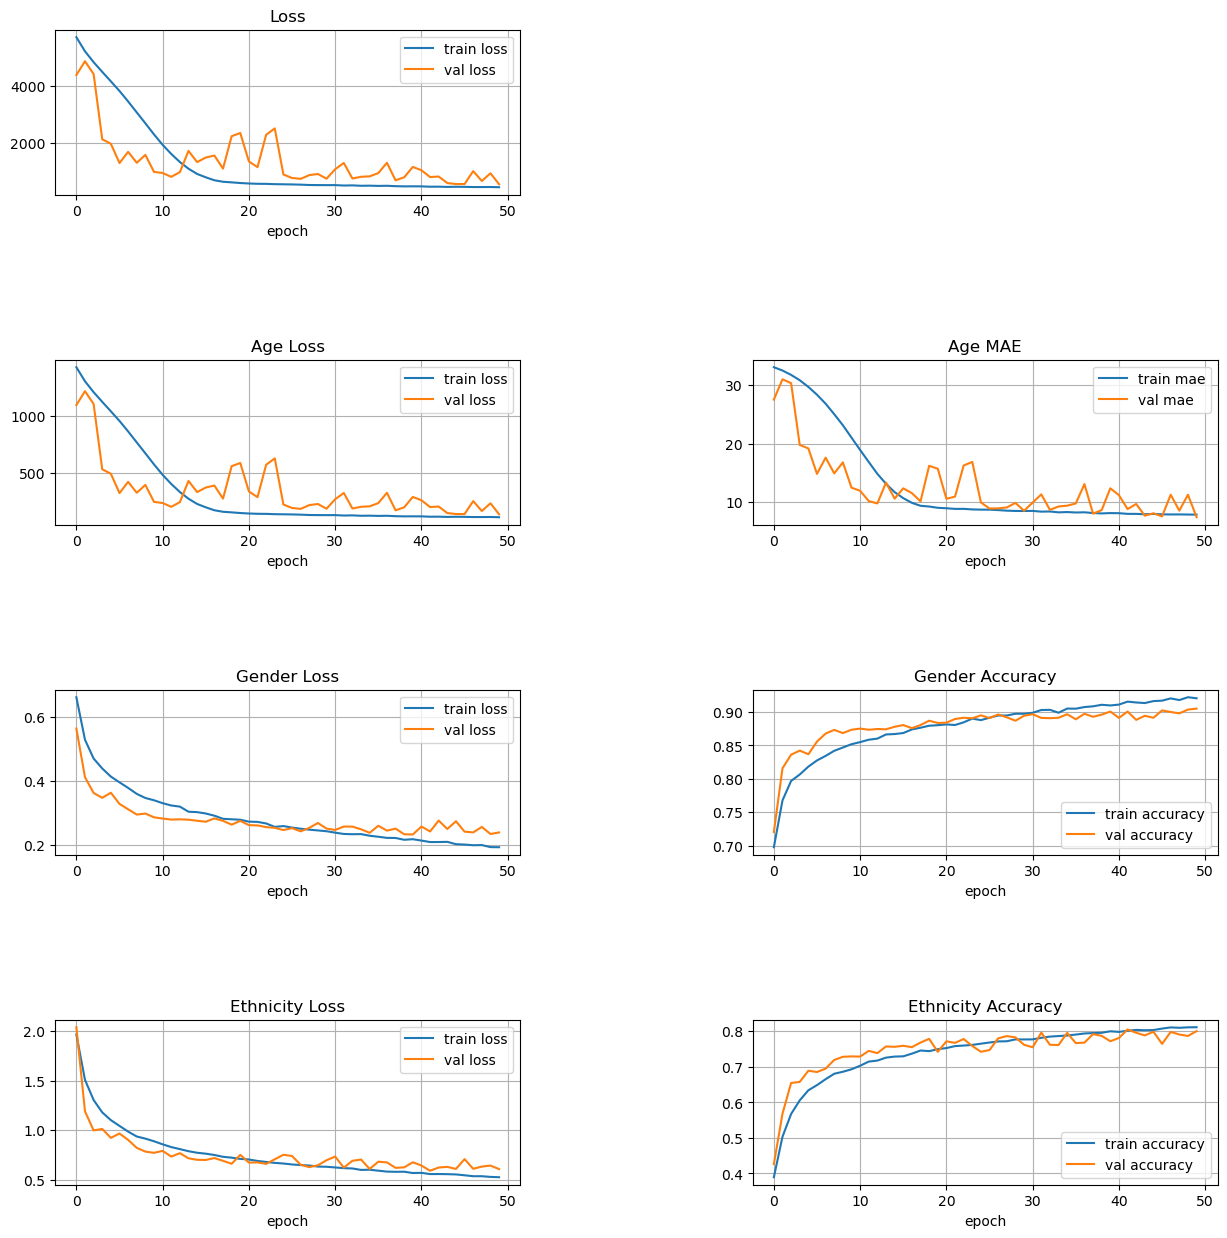

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)

fig.add_subplot(4,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,3)
plt.plot(history.history['age_output_loss'], label='train loss')
plt.plot(history.history['val_age_output_loss'], label='val loss')
plt.title('Age Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,4)
plt.plot(history.history['age_output_mae'], label='train mae')
plt.plot(history.history['val_age_output_mae'], label='val mae')
plt.title('Age MAE')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,5)
plt.plot(history.history['gender_output_loss'], label='train loss')
plt.plot(history.history['val_gender_output_loss'], label='val loss')
plt.title('Gender Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,6)
plt.plot(history.history['gender_output_accuracy'], label='train accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='val accuracy')
plt.title('Gender Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,7)
plt.plot(history.history['ethnicity_output_loss'], label='train loss')
plt.plot(history.history['val_ethnicity_output_loss'], label='val loss')
plt.title('Ethnicity Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,8)
plt.plot(history.history['ethnicity_output_accuracy'], label='train accuracy')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='val accuracy')
plt.title('Ethnicity Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

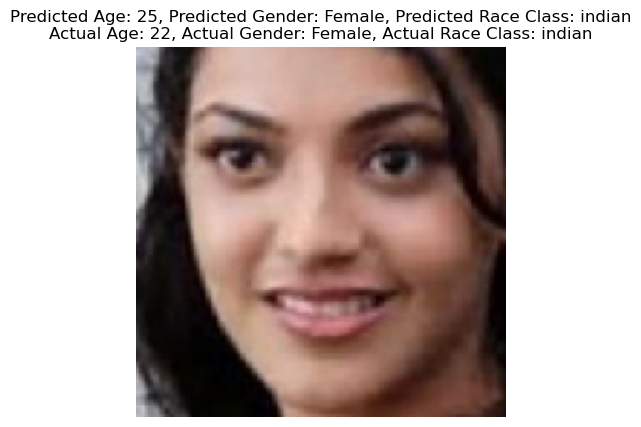

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
import re

# Load the saved model
model = load_model('Best_model_params.h5')

# Example filename
filename = '22_1_3_20170104232458346.jpg.chip.jpg'

# Extract information from the filename using regular expressions
match = re.match(r'(\d+)_(\d+)_(\d+)', filename)

# Check if the match is found
if match:
    # Extract components
    actual_age = int(match.group(1))
    actual_gender = "Female" if int(match.group(2)) == 1 else "Male"
    
    # Define labels for ethnicity based on numerical codes
    ethnicity_labels = ['white', 'black', 'asian', 'indian', 'others']
    
    # Assuming the third component represents ethnicity
    ethnicity_code = int(match.group(3))
    actual_race_class_label = ethnicity_labels[ethnicity_code]
    
    # Load the image
    img_path = 'UTKFace//' + filename
    img = image.load_img(img_path, target_size=(128, 128))

    # Display the image along with predicted and actual information
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    
    # Predict using the loaded model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = model.predict(img_array, verbose=0)

    # Interpret and print the predictions
    predicted_age = round(predictions[0][0][0])
    gender_probability = predictions[1][0][0]
    predicted_gender = "Female" if gender_probability > 0.5 else "Male"
    race_probabilities = predictions[2][0]
    predicted_race_class = ethnicity_labels[np.argmax(race_probabilities)]

    # Print predicted and actual information
    plt.title(f"Predicted Age: {predicted_age}, Predicted Gender: {predicted_gender}, Predicted Race Class: {predicted_race_class}\n"
              f"Actual Age: {actual_age}, Actual Gender: {actual_gender}, Actual Race Class: {actual_race_class_label}")
    
    # Show the figure
    plt.show()
else:
    print("Filename does not match the expected pattern.")

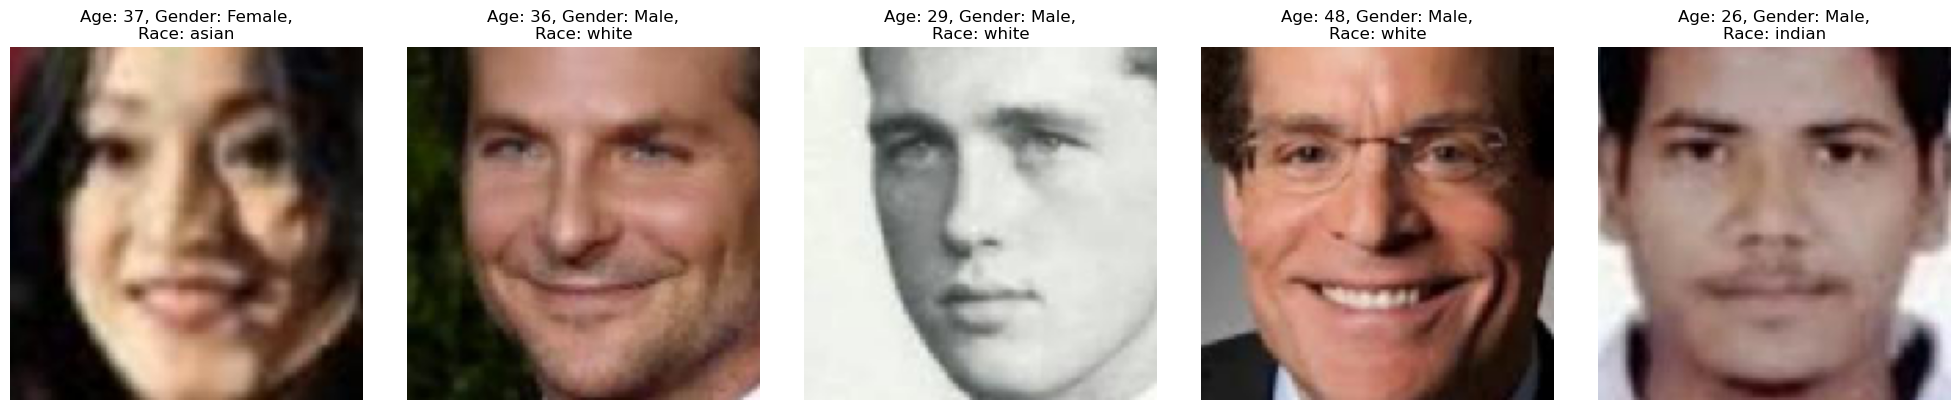

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import random


num_images_to_display = 5  # Number of images you want to process
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))  # Adjust figsize as needed

for i in range(num_images_to_display):
    # Select a random image from the validation data
    idx = random.randint(0, len(val_generator) - 1)
    img, _ = val_generator[idx]
    img = img[0]  # Get the first image from the batch

    # Preprocess the image for the model
    img_array = np.expand_dims(img, axis=0)  # The image is already a numpy array

    # Make predictions
    predictions = model.predict(img_array, verbose=0)

    # Interpret the predictions
    age = round(predictions[0][0][0])
    gender_probability = predictions[1][0][0]
    gender = "Female" if gender_probability > 0.5 else "Male"
    labels = ['white', 'black', 'asian', 'indian', 'others']
    race_probabilities = predictions[2][0]
    race_class = np.argmax(race_probabilities)
    race_class_label = labels[race_class]

    # Display the image with predictions in the subplot
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Age: {age}, Gender: {gender},\nRace: {race_class_label}')

plt.tight_layout()
plt.show()


### Real Time Prediction

In [27]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Load the model
model = load_model('Best_model_params.h5')

# Define labels for race
labels = ['white', 'black', 'asian', 'indian', 'others']

# Start video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the captured frame to RGB
    color_converted = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Preprocess the frame for the model
    img = cv2.resize(color_converted, (128,128))  # Adjust width and height to match model's input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize if required by your model

    # Make predictions
    predictions = model.predict(img_array, verbose=0)

    # Process the predictions
    # Age prediction
    age = round(predictions[0][0][0])
    
    # Gender prediction
    gender_probability = predictions[1][0][0]
    gender = "Female" if gender_probability > 0.5 else "Male"
    
    # Race class prediction
    race_probabilities = predictions[2][0]
    race_class_index = np.argmax(race_probabilities)
    race_class_label = labels[race_class_index]

    # Display the frame using Matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Age: {age}, Gender: {gender}, Race: {race_class_label}')
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf().clear()

    # Break the loop with a specific condition (e.g., a key press check, depends on your environment)
    # This part might need to be modified according to your running environment

# Release the capture
cap.release()